# EDA sobre os filmes transmitidos na Sessão da Tarde

O Web Scraping foi feito com os dados de transmissões referentes ao periodo de 1987 a 2021.

<img src="./sessao-da-tarde.jpg" height="390" width="700">

### Importações

In [1]:
import numpy as np
import pandas as pd

from tabulate import tabulate

import sys
# código referente a pasta utils
sys.path.append('./utils/')
from utils.text_process import *

[nltk_data] Downloading package stopwords to /home/jr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Leitura dos dados

In [2]:
df = pd.read_csv("./data/sessao_da_tarde.csv")

df.head(10)

,titulo,ano,mes,dia
0,Percy Jackson e o Ladrão de Raios,2021,Janeiro,01
1,Pai em Dose Dupla,2021,Janeiro,04
2,Turma da Mônica: Laços,2021,Janeiro,05
3,Hotel Transilvânia 2,2021,Janeiro,06
4,O Diário da Princesa,2021,Janeiro,07
5,Stardust: O Mistério da Estrela,2021,Janeiro,08
6,Férias da Família Johnson,2021,Janeiro,11
7,Os Pinguins do Papai,2021,Janeiro,12
8,Shrek 2,2021,Janeiro,13
9,Sonhos de Papel,2021,Janeiro,14


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8421 entries, 0 to 8420
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   titulo  8421 non-null   object
 1   ano     8421 non-null   int64 
 2   mes     8421 non-null   object
 3   dia     8421 non-null   object
dtypes: int64(1), object(3)
memory usage: 263.3+ KB


In [5]:
print(f"Quantidade de filmes transmitidos: {df.shape[0]}")

Quantidade de filmes transmitidos: 8421


In [6]:
print(f"Quantidade de filmes distintos transmitidos: {df['titulo'].nunique()}")

Quantidade de filmes distintos transmitidos: 3409


### Top-10 Filmes com maior frequência de transmissão

In [7]:
df["titulo"].value_counts().head(10)

titulo
De Volta À Lagoa Azul           18
De Repente 30                   16
Um Príncipe Em Nova York        15
O Rapto Do Menino Dourado       15
Curtindo A Vida Adoidado        15
Ghost: Do Outro Lado Da Vida    15
A Família Buscapé               15
Matilda                         14
Táxi                            14
O Pestinha                      14
Name: count, dtype: int64

### Quantidade de filmes transmitidos por mês

In [8]:
df.groupby("mes")["titulo"].count().sort_values(ascending=False)

mes
Janeiro      761
Março        747
Dezembro     744
Outubro      741
Novembro     720
Agosto       718
Setembro     708
Abril        704
Maio         704
Julho        687
Junho        604
Fevereiro    583
Name: titulo, dtype: int64

### Top-10 anos com a maior quantidade de filmes transmitidos

In [9]:
df.groupby("ano")["titulo"].count().sort_values(ascending=False).head(10)

ano
2020    260
2008    259
2019    255
2021    254
2009    253
2011    251
1989    250
2003    249
2012    249
2007    248
Name: titulo, dtype: int64

### Top-5 filmes mais transmitidos no mês de Dezembro

In [10]:
df.groupby("mes")["titulo"].value_counts(ascending=False)["Dezembro"].head(5)

titulo
O Príncipe Do Egito            6
Apenas Amigos                  4
Menores Desacompanhados        3
Uma Garota Encantada           3
Um Natal Muito, Muito Louco    3
Name: count, dtype: int64

### Filmes que foram transmitidos durante o Natal

In [11]:
df.groupby(["mes", "dia"])["titulo"].value_counts(ascending=False)["Dezembro", "25"]

titulo
Esqueceram De Mim 2: Perdido Em Nova York       2
A Bússola de Ouro                               1
Apenas Amigos                                   1
Santa Buddies: Uma Aventura de Natal            1
Um Natal Muito, Muito Louco                     1
Toy Story: Um Mundo De Aventuras                1
Sexta-Feira                                     1
PéPequeno                                       1
As Gêmeas Da Sorte                              1
Os Saltimbancos Trapalhões: Rumo a Hollywood    1
O Reino Gelado                                  1
O Príncipe Do Egito                             1
O Natal Mágico                                  1
O Natal Maluco De Ernest                        1
O Grinch                                        1
O Cristal Encantado                             1
Monstros VS Alienígenas                         1
Frozen: Uma Aventura Congelante                 1
FormiguinhaZ                                    1
Esqueceram de Mim                          

### Filmes que foram transmitidos no último dia do ano

In [12]:
df.groupby(["mes", "dia"])["titulo"].value_counts(ascending=False)["Dezembro", "31"]

titulo
Tarzan E Jane                             1
Tainá 2: A Aventura Continua              1
Como Treinar o seu Dragão                 1
Segurança De Shopping                     1
Popeye                                    1
Os Vagabundos Trapalhões                  1
Os Goonies                                1
Operação Zodíaco                          1
O Terno De 2 Bilhões De Dólares           1
O Pequeno Stuart Little 2                 1
O Espanta Tubarões                        1
O Cangaceiro Trapalhão                    1
Noite de Ano Novo                         1
Mom And Dad: Uma Aventura No Espaço       1
Karatê Kid: a Hora da Verdade             1
Hotel Transilvânia                        1
Bambi 2: O Grande Príncipe Da Floresta    1
A Ilha Do Tesouro                         1
A Creche Do Papai                         1
Name: count, dtype: int64

### Filmes que foram exibidos no mesmo mês e dia

O mesmo filme exibido no mesmo mês e dia...

In [13]:
df[df.duplicated(subset=["titulo", "mes", "dia"], keep=False)].sort_values(by="titulo", ascending=True)

,titulo,ano,mes,dia
3646,3 Ninjas Do Barulho,2007,Janeiro,12
3668,3 Ninjas Do Barulho,2006,Janeiro,12
2922,A Filha Do Presidente,2009,Fevereiro,02
1252,A Filha Do Presidente,2016,Fevereiro,02
6209,A Joia Do Nilo,1996,Setembro,10
...,...,...,...,...
3660,Um Tira No Jardim De Infância,2006,Janeiro,02
1955,Vestida Para Casar,2013,Fevereiro,26
1268,Vestida Para Casar,2016,Fevereiro,26
3653,Xuxa Popstar,2007,Janeiro,23


### Quantidade de filmes que foram transmitidos no mesmo mês e dia

In [14]:
df[df.duplicated(subset=["titulo", "mes", "dia"])]["titulo"].nunique()

76

#### Filmes transmitidos no dia 29 de Fevereiro, em um ano bissexto

In [15]:
df[(df["dia"] == "29") & (df["mes"] == "Fevereiro")]

,titulo,ano,mes,dia
1269,Esposa De Mentirinha,2016,Fevereiro,29
2200,Duplex,2012,Fevereiro,29
3193,Bebês Em Ação,2008,Fevereiro,29
5160,O Grande Dragão Branco,2000,Fevereiro,29
6082,Um Visto Para O Céu,1996,Fevereiro,29
7991,O Planeta Proibido,1988,Fevereiro,29


### Filme com o título mais longo

In [16]:
df.iloc[df["titulo"].str.len().idxmax(), :]["titulo"]

'FernGully: As Aventuras De Zak E Crysta Na Floresta Tropical'

### Filme com o menor título

In [17]:
df.iloc[df["titulo"].str.len().idxmin(), :]["titulo"]

'Rio'

## Análise Textual

In [18]:
titulos = processing(df["titulo"])
counter_words = words_counting(titulos)
most_common_words = counter_words.most_common(10)

### Top-10 palavras mais comuns nos títulos dos filmes

In [19]:
table = np.array([[word for word, _ in most_common_words],
                [qtd for _, qtd in most_common_words]]).T

print(tabulate(table,
                 headers = ['Palavra', 'Contagem'],
                 tablefmt = 'fancy_grid'))

╒════════════╤════════════╕
│ Palavra    │   Contagem │
╞════════════╪════════════╡
│ amor       │        313 │
├────────────┼────────────┤
│ vida       │        165 │
├────────────┼────────────┤
│ família    │        123 │
├────────────┼────────────┤
│ volta      │         99 │
├────────────┼────────────┤
│ aventura   │         98 │
├────────────┼────────────┤
│ trapalhões │         97 │
├────────────┼────────────┤
│ grande     │         90 │
├────────────┼────────────┤
│ aventuras  │         89 │
├────────────┼────────────┤
│ papai      │         77 │
├────────────┼────────────┤
│ príncipe   │         77 │
╘════════════╧════════════╛


### Nuvem de Palavras

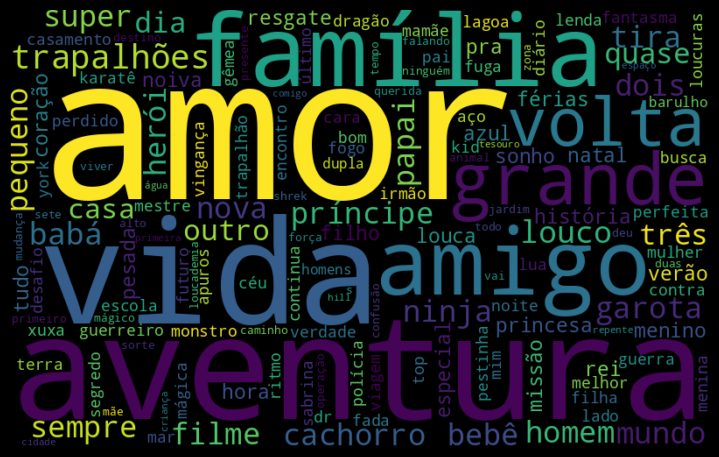

In [20]:
plot_wordcloud(text=titulos)